In [3]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.evaluation import evaluate_policy
import torch
from IPython.display import display, Image
import time

In [4]:
env = gym.make('LunarLanderContinuous-v3', render_mode='rgb_array')
eval_env = gym.make('LunarLanderContinuous-v3', render_mode='rgb_array')

In [5]:
print(f"Акционен простор: {env.action_space}")
print(f"Состојбен простор: {env.observation_space}")

Акционен простор: Box(-1.0, 1.0, (2,), float32)
Состојбен простор: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)


In [6]:
n_actions = env.action_space.shape[-1]
noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=0.2 * np.ones(n_actions))

In [37]:
model = DDPG(
    policy='MlpPolicy',
    env=env,
    learning_rate=0.001,
    buffer_size=200000,
    batch_size=128,
    gamma=0.98,
    tau=0.005,
    train_freq=(1, 'episode'),
    gradient_steps=-1,
    action_noise=noise,
    policy_kwargs=dict(net_arch=[400, 300]),
    learning_starts=10000,
    verbose=1,
    device='cuda'
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [38]:
model.learn(total_timesteps=50000, log_interval=10)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 107      |
|    ep_rew_mean     | -258     |
| time/              |          |
|    episodes        | 10       |
|    fps             | 1792     |
|    time_elapsed    | 0        |
|    total_timesteps | 1070     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | -284     |
| time/              |          |
|    episodes        | 20       |
|    fps             | 1111     |
|    time_elapsed    | 2        |
|    total_timesteps | 2808     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 131      |
|    ep_rew_mean     | -267     |
| time/              |          |
|    episodes        | 30       |
|    fps             | 1227     |
|    time_elapsed    | 3        |
|    total_timesteps | 3941     |
--------------

KeyboardInterrupt: 

In [17]:
def show_video(frames, framerate=30):
    height, width, _ = frames[0].shape
    plt.figure(figsize=(width / 72.0, height / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    from matplotlib import animation
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=1000/framerate)

    anim.save('lunar_lander.gif', writer='pillow', fps=framerate)

    plt.close()

    return Image('lunar_lander.gif')

In [18]:
def run_episode(model, env, deterministic=True):
    frames = []
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        frames.append(env.render())
        action, _ = model.predict(state, deterministic=deterministic)
        state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        done = terminated or truncated

    return frames, total_reward

Награда за епизодата: 149.63243203193872


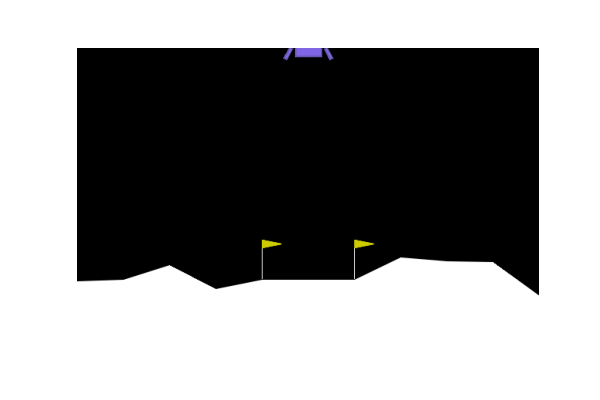

In [39]:
frames, reward = run_episode(model, env)
print(f"Награда за епизодата: {reward}")
display(show_video(frames))

In [40]:
mean_reward_50, std_reward_50 = evaluate_policy(model, eval_env, n_eval_episodes=50, deterministic=True)
print(f"Просечна награда во 50 итерации: {mean_reward_50:.2f} ± {std_reward_50:.2f}")

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Просечна награда во 50 итерации: -108.34 ± 137.89


In [41]:
mean_reward_100, std_reward_100 = evaluate_policy(model, eval_env, n_eval_episodes=100, deterministic=True)
print(f"Просечна награда во 100 итерации: {mean_reward_100:.2f} ± {std_reward_100:.2f}")

Просечна награда во 100 итерации: -78.29 ± 162.09
